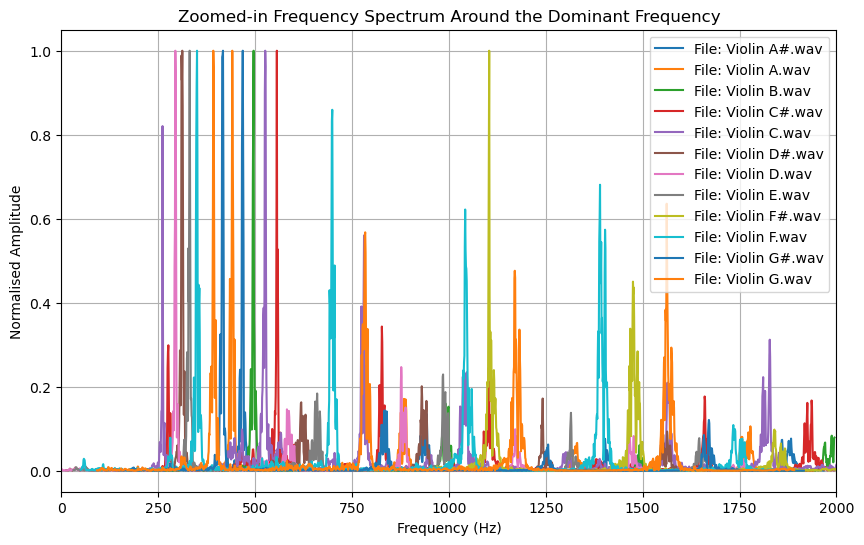

In [4]:
import numpy as np
import os
import scipy.signal as ss
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt

# Create the directory for trimmed files if it doesn't exist
os.makedirs('trimmed_files', exist_ok=True)

# Set up the figure for all plots
plt.figure(figsize=(10, 6))

# Loop through the files in the 'sound_data' folder
for file in os.listdir('sound_data'):
    if file.endswith('.wav'):
        # Read the file
        sample_rate, data = wav.read(os.path.join('sound_data', file))
        
        # If the file is stereo (2 channels), take only the first channel (column)
        if len(data.shape) > 1:  
            data = data[:, 0]  # Take only the first channel
        
        # Trim the first 1 second of the data (44100 samples for 44.1kHz sample rate)
        trimmed_data = data[:44100]

        # Perform the FFT analysis on the trimmed data
        fft_data = np.fft.fft(trimmed_data)
        amplitude = np.abs(fft_data)
        frequencies = np.fft.fftfreq(len(trimmed_data), 1 / sample_rate)

        # Filter only positive frequencies
        positive_frequencies = frequencies[:len(frequencies) // 2]
        positive_amplitude = amplitude[:len(amplitude) // 2]

        # Find peaks in the amplitude spectrum
        peak_indices, _ = ss.find_peaks(positive_amplitude, prominence=20)

        # Determine the central peak index
        central_index = np.argmax(positive_amplitude)

        # Define the threshold window: central_index - 300 to central_index + 1500
        start_index = max(0, central_index - 300)  # Ensure it doesn't go below 0
        end_index = min(len(positive_frequencies), central_index + 1500)  # Ensure it doesn't exceed array length

        # Slice the frequency and amplitude arrays based on the threshold window
        spliced_frequencies = positive_frequencies[start_index:end_index]
        spliced_amplitude = positive_amplitude[start_index:end_index]

        # Normalize the amplitude
        normalised_amplitude = spliced_amplitude / positive_amplitude[central_index]

        # Plot the normalised frequency spectrum for this file
        plt.plot(spliced_frequencies, normalised_amplitude, label=f'File: {file}')

# Set the plot's properties
plt.title('Zoomed-in Frequency Spectrum Around the Dominant Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalised Amplitude')
plt.grid(True)
plt.xlim(0, 2000)  # Limiting x-axis range for better visibility
plt.legend()  # Show a legend to distinguish files
plt.show()


Text(0.5, 1.0, 'Frequency')

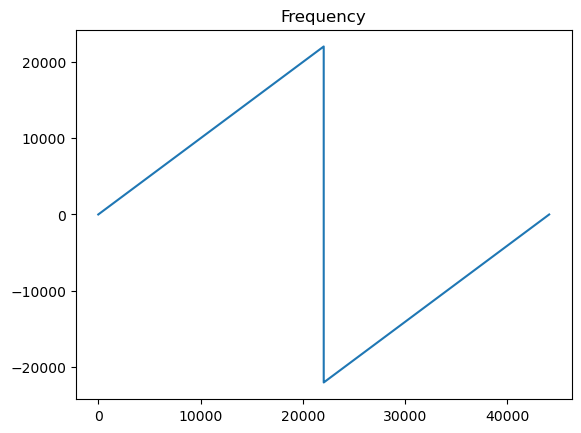

In [8]:
from matplotlib import pyplot as plt
plt.plot(frequencies)
plt.title('Frequency')

Text(0.5, 1.0, 'Data before trimming')

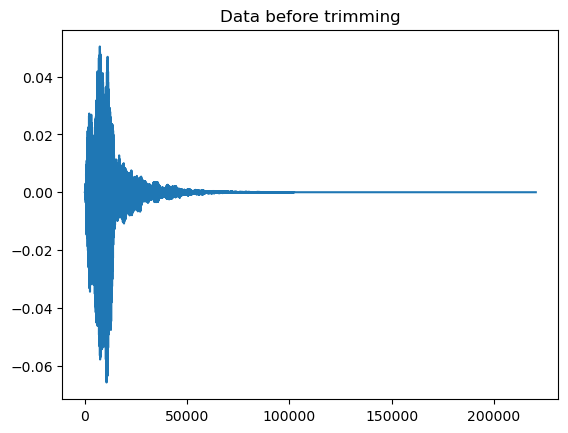

In [14]:
plt.plot(data)
plt.title('Data before trimming')

Text(0.5, 1.0, 'Amplitude')

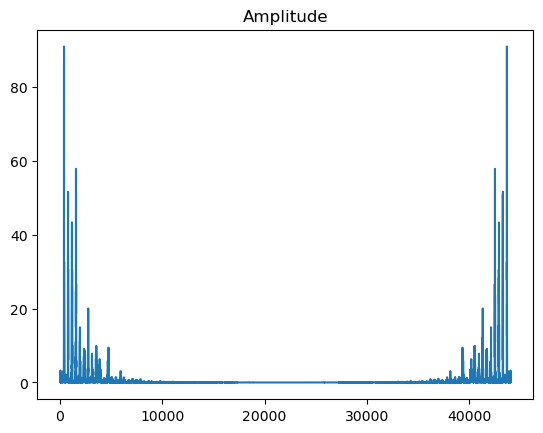

In [12]:
plt.plot(amplitude)
plt.title('Amplitude')

Text(0.5, 1.0, 'Data after trimming')

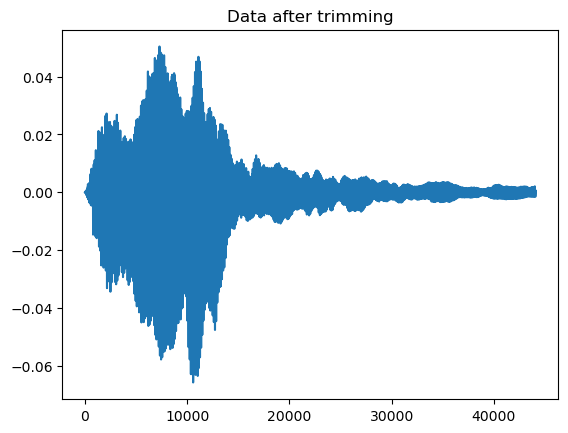

In [16]:
plt.plot(trimmed_data)
plt.title('Data after trimming')

Text(0.5, 1.0, 'FFT Data')

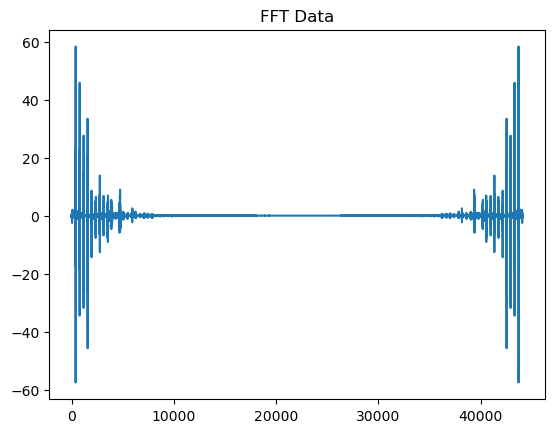

In [18]:
plt.plot(fft_data)
plt.title('FFT Data')